# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium 
from folium.plugins import MarkerCluster
def count_nan_zeros(df):
    nan_zeros = {}
    for col in df.columns:
        total_count = len(df[col])
        nan_count = df[col].isna().sum()
        zero_count = (df[col]==0).sum()
        unique_count = df[col].nunique()
        nan_zeros[col] = {
            "NaNs" : nan_count,
            "Zeros" : zero_count,
            "Uniques" : unique_count
        }
    return pd.DataFrame.from_dict(nan_zeros, orient = "index")


In [2]:
# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
df_raw = pd.read_csv('assets/real_estate.csv', sep=';')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [3]:
df_raw.sample(10, random_state=2025)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
11956,11957,153704529,False,habita mad,918007061.0,https://www.fotocasa.es/es/comprar/vivienda/gu...,3.0,1.0,72.0,214000,...,0,0,0,0,0,0,"40,46449","-3,63265",NaN,NaN
7285,7286,150530836,False,desarrollo de viviendas nueva ciudad,916358709.0,https://www.fotocasa.es/vivienda/alcala-de-hen...,3.0,2.0,112.0,243800,...,0,0,0,0,0,0,"40,23768","-3,77423",NaN,NaN
14035,14036,153921873,False,garsierra,912179623.0,https://www.fotocasa.es/es/comprar/vivienda/ti...,1.0,2.0,72.0,85000,...,0,0,0,0,0,1,"40,5506749","-3,3772946",NaN,NaN
10823,10824,150512853,False,covibarges,912175971.0,https://www.fotocasa.es/vivienda/arganda-del-r...,3.0,2.0,107.0,255000,...,0,0,0,0,0,1,"40,38219","-3,53069",NaN,NaN
5778,5779,148949209,False,urban,912780256.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,4.0,4.0,NaN,439000,...,0,0,0,0,0,0,"40,39723","-3,99894",NaN,NaN
11905,11906,153945932,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,NaN,NaN,100.0,152250,...,0,0,0,0,0,1,"40,47349","-3,36515",NaN,NaN
3319,3320,152564823,False,aproperties,914890879.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,3.0,200.0,1320000,...,0,0,0,0,0,0,"40,42092","-3,69983",NaN,NaN
2345,2346,152424227,False,mr house,911369017.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,2.0,2.0,81.0,149500,...,0,0,0,0,0,0,"40,2367357","-3,7684312",NaN,NaN
2453,2454,153258497,False,engel volkers madrid,910758015.0,https://www.fotocasa.es/es/comprar/vivienda/tr...,NaN,6.0,480.0,870000,...,0,0,0,0,0,0,"40,59254","-3,58344",NaN,NaN
3656,3657,153552213,False,villa gestiones inmobiliarias,NaN,https://www.fotocasa.es/es/comprar/vivienda/sa...,3.0,1.0,82.0,127500,...,0,0,0,0,0,0,"40,3955","-3,66676",NaN,NaN


In [4]:
count_nan_zeros(df_raw)

,NaNs,Zeros,Uniques
Unnamed: 0,0,0,15335
id_realEstates,0,0,14217
isNew,0,15198,2
realEstate_name,10,0,1821
phone_realEstate,794,0,1807
url_inmueble,0,0,493
rooms,353,0,17
bathrooms,345,0,14
surface,1250,0,728
price,0,60,2633


In [5]:
df_baking = df_raw.copy()
df_baking = df_baking.iloc[:,1:-2]
df_baking = df_baking.drop(['country','level1','level2'], axis = 1)
df_baking = df_baking.drop(['countryId','level1Id','level2Id','level3Id','level4Id'], axis = 1)
df_baking = df_baking.drop(['level5Id','level6Id','level7Id','level8Id'], axis = 1)
df_baking['latitude'] = df_baking['latitude'].apply(lambda x: float(x.replace(',','.')))
df_baking['longitude'] = df_baking['longitude'].apply(lambda x: float(x.replace(',','.')))
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_realEstates    15335 non-null  int64  
 1   isNew             15335 non-null  bool   
 2   realEstate_name   15325 non-null  object 
 3   phone_realEstate  14541 non-null  float64
 4   url_inmueble      15335 non-null  object 
 5   rooms             14982 non-null  float64
 6   bathrooms         14990 non-null  float64
 7   surface           14085 non-null  float64
 8   price             15335 non-null  int64  
 9   date              15335 non-null  object 
 10  description       15193 non-null  object 
 11  address           15335 non-null  object 
 12  level3            15335 non-null  object 
 13  level4            8692 non-null   object 
 14  level5            15335 non-null  object 
 15  level6            708 non-null    object 
 16  level7            13058 non-null  object

#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [6]:
# TODO
indice_maximo = df.loc[df['price'].idxmax()]
address = indice_maximo["address"]
price =  indice_maximo['price']
print(f'La casa con la direccion en {address} es la mas cara y su precio es de {price} USD')

La casa con la direccion en El Escorial es la mas cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [7]:
# TODO
df_filtrado = df[df['price']> 0]
indice_minimo = df_filtrado.loc[df_filtrado['price'].idxmin()]
address = indice_minimo["address"]
price =  indice_minimo['price']
print(f'La casa con la direccion en {address} es la mas barata y su precio es de {price} USD')

La casa con la direccion en Berlin, Coslada es la mas barata y su precio es de 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [8]:
# TODO
indice_maximo = df_filtrado.loc[df_filtrado['surface'].idxmax()]
address = indice_maximo["address"]
surface =  indice_maximo['surface']
print(f'La casa mas grande esta ubicada en {address} y su superficie es de {surface} metros')

indice_minimo = df_filtrado.loc[df_filtrado['surface'].idxmin()]
address = indice_minimo["address"]
surface =  indice_minimo['surface']
print(f'La casa mas pequeña esta ubicada en {address} y su superficie es de {surface} metros')

La casa mas grande esta ubicada en Sevilla la Nueva y su superficie es de 249000.0 metros
La casa mas pequeña esta ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [9]:
# TODO
# Obtener las poblaciones únicas en la columna level5
populations = df['level5'].unique()

# Imprimir el número de poblaciones
print(f'Número de poblaciones: {len(populations)}')

# Imprimir los nombres de las poblaciones separadas por coma
populations_str = ', '.join(populations)
print(populations_str)

Número de poblaciones: 168
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeigl

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [10]:
# TODO
df.isnull().any(axis=0) 

id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
accuracy            False
latitude            False
longitude           False
dtype: bool

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [11]:
# TODO
df.dropna()

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level3,level4,level5,level6,level7,level8,upperLevel,accuracy,latitude,longitude


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [12]:
# TODO
df.query("level5=='Arroyomolinos (Madrid)'")["price"].mean().round(1) # metodo query, facil de filtrar

np.float64(294541.6)

#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


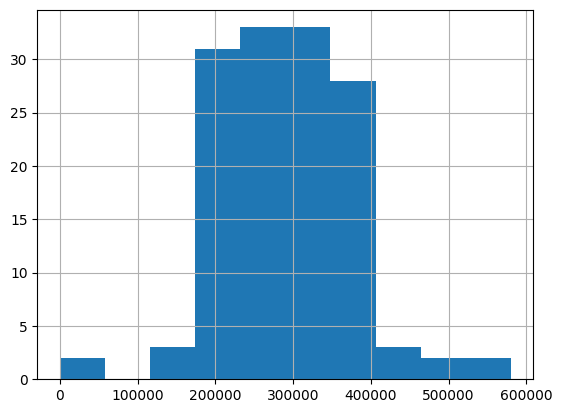

In [13]:
# TODO: 
df.query("level5=='Arroyomolinos (Madrid)'")["price"].hist()
plt.show()


**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [14]:
# TODO
vprice = df.query("level5=='Valdemorillo'")["price"].mean().round(1)
gprice = df.query("level5=='Galapagar'")["price"].mean().round(1)
print(f"Precio medio de Valdemorillo es: {vprice}, > Precio medio de Galapagar es: {gprice}")

Precio medio de Valdemorillo es: 363860.3, > Precio medio de Galapagar es: 360063.2


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [15]:
# TODO
filter = df[df['level5'].isin(['Valdemorillo', 'Galapagar'])]
(
    filter
    .assign(pps = filter['price']/filter['surface'])
    .groupby("level5")['price'].agg('mean').round(1)
) # encadenamiento pandas

level5
Galapagar       360063.2
Valdemorillo    363860.3
Name: price, dtype: float64

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

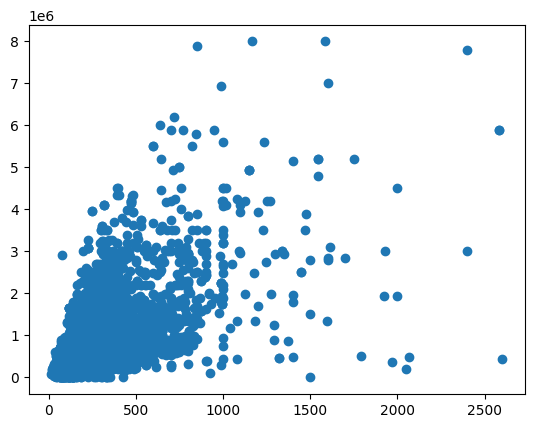

In [16]:
# TODO: Código
filter = df[df['surface']<3000]
plt.scatter(filter['surface'], filter['price'])
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [17]:
# TODO
df['realEstate_name'].nunique()

1821

#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [18]:
# TODO
df['level5'].value_counts()
print('La comuna con mas casas es Madrid Capital con 6643')

La comuna con mas casas es Madrid Capital con 6643


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [19]:
# TODO
df_cs = df[df['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 1 to 15325
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_realEstates    907 non-null    int64  
 1   isNew             907 non-null    bool   
 2   realEstate_name   907 non-null    object 
 3   phone_realEstate  854 non-null    float64
 4   url_inmueble      907 non-null    object 
 5   rooms             902 non-null    float64
 6   bathrooms         897 non-null    float64
 7   surface           787 non-null    float64
 8   price             907 non-null    int64  
 9   date              907 non-null    object 
 10  description       902 non-null    object 
 11  address           907 non-null    object 
 12  level3            907 non-null    object 
 13  level4            907 non-null    object 
 14  level5            907 non-null    object 
 15  level6            0 non-null      object 
 16  level7            907 non-null    object 
 17  

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

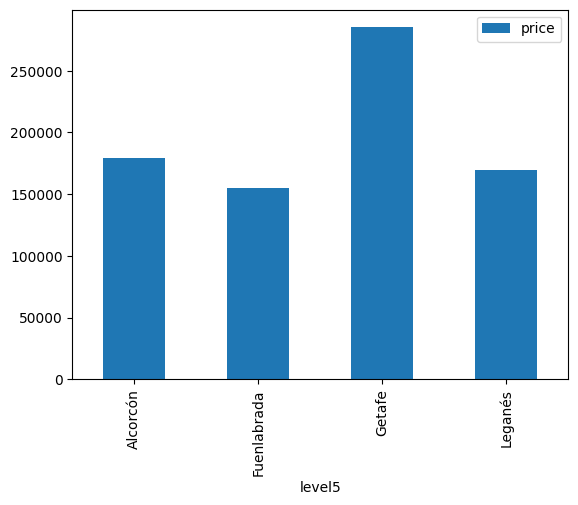

In [20]:
# TODO: Code
result = df_cs.groupby('level5')['price'].agg('median').to_frame()
result.plot(kind = 'bar')
plt.show()


**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [21]:
# TODO
result = df_cs[['price','rooms','surface','bathrooms']].describe().T
result.iloc[:,1:3]

,mean,std
price,223094.480706,122153.049524
rooms,3.017738,0.847871
surface,111.752224,65.292050
bathrooms,1.633222,0.756173


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [22]:
# TODO
df_cs.groupby('level5')['price'].agg('max')

level5
Alcorcón        950000
Fuenlabrada     490000
Getafe         1050000
Leganés         650000
Name: price, dtype: int64

#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

In [23]:
# TODO
def min_max_normalize(df):
    min_price = df['price'].min()
    max_price = df['price'].max()
    df['norm'] = (df['price']- min_price)/ (max_price - min_price)
    return df
df_cs.groupby('level5').apply(min_max_normalize)

/tmp/ipykernel_41441/2364238358.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cs.groupby('level5').apply(min_max_normalize)


id_realEstates  isNew  \
level5                                  
Alcorcón 85          153152077  False   
         109         153586414  False   
         765         154002468   True   
         816         154001779   True   
         827         154001766   True   
...                        ...    ...   
Leganés  15015       153905987  False   
         15024       152450071  False   
         15238       153834575  False   
         15263       153903771  False   
         15291       151697757  False   

                                          realEstate_name  phone_realEstate  \
level5                                                                        
Alcorcón 85                       sinergical inmobiliaria               NaN   
         109              area uno asesores inmobiliarios       912664081.0   
         765                                         raul               NaN   
         816                                      deplace       910750918.0   
         827                 tecnocasa ciudad de alcorcon       911795412.0   
...                                                   ...               ...   
Leganés  15015                          outletdeviviendas       912172097.0   
         15024                    vivienda madrid leganes       911799348.0   
         15238                          tecnocasa leganes       912665579.0   
         15263  aliseda servicios de gestion inmobiliaria       911368198.0   
         15291                                    unipiso       912788631.0   

                                                     url_inmueble  rooms  \
level5                                                                     
Alcorcón 85     https://www.fotocasa.es/es/comprar/vivienda/le...    1.0   
         109    https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0   
         765    https://www.fotocasa.es/es/comprar/vivienda/ma...    4.0   
         816    https://www.fotocasa.es/es/comprar/vivienda/la...    3.0   
         827    https://www.fotocasa.es/es/comprar/vivienda/la...    3.0   
...                                                           ...    ...   
Leganés  15015  https://www.fotocasa.es/vivienda/getafe/calle-...    2.0   
         15024  https://www.fotocasa.es/vivienda/getafe/calle-...    3.0   
         15238  https://www.fotocasa.es/es/comprar/vivienda/pa...    3.0   
         15263  https://www.fotocasa.es/es/comprar/vivienda/fu...    4.0   
         15291  https://www.fotocasa.es/es/comprar/vivienda/al...    3.0   

                bathrooms  surface   price                          date  ...  \
level5                                                                    ...   
Alcorcón 85           1.0     50.0  107000   2019-12-28T18:30:53.960102Z  ...   
         109          3.0    142.0  425000  2019-12-28T18:32:32.5337942Z  ...   
         765          2.0    109.0  248000          2019-12-28T17:10:00Z  ...   
         816          2.0     96.0  299000          2019-12-28T13:04:00Z  ...   
         827          1.0     65.0  119900          2019-12-28T12:59:00Z  ...   
...                   ...      ...     ...                           ...  ...   
Leganés  15015        1.0     74.0  114000          2019-12-18T05:07:00Z  ...   
         15024        2.0    102.0  259800          2019-12-18T05:00:00Z  ...   
         15238        1.0     72.0   89900          2019-12-17T19:26:00Z  ...   
         15263        3.0    249.0  390004          2019-12-17T19:02:00Z  ...   
         15291        2.0    110.0  279000          2019-12-17T18:57:00Z  ...   

                           level4    level5 level6  \
level5                                               
Alcorcón 85     Alcorcón, Zona de  Alcorcón    NaN   
         109    Alcorcón, Zona de  Alcorcón    NaN   
         765    Alcorcón, Zona de  Alcorcón    NaN   
         816    Alcorcón, Zona de  Alcorcón    NaN   
         827    Alcorcón, Zona de  Alcorcón    NaN   
...                           ...

/tmp/ipykernel_41441/1420863869.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_cs.groupby('level5').apply(min_max_normalize).reset_index(drop = True)


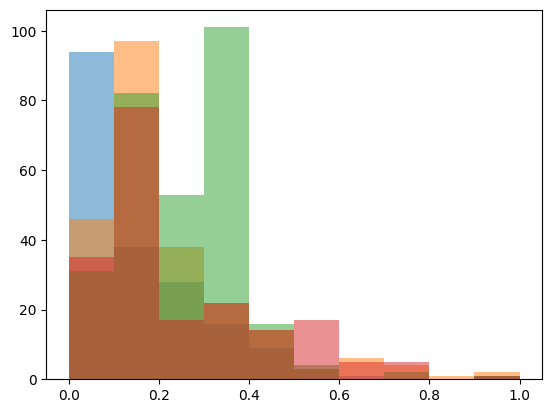

In [24]:
result = df_cs.groupby('level5').apply(min_max_normalize).reset_index(drop = True)
for city in result['level5'].unique():
    city_data = result[result['level5']==city]
    plt.hist(city_data['norm'], label=city, alpha=0.5)
plt.show()


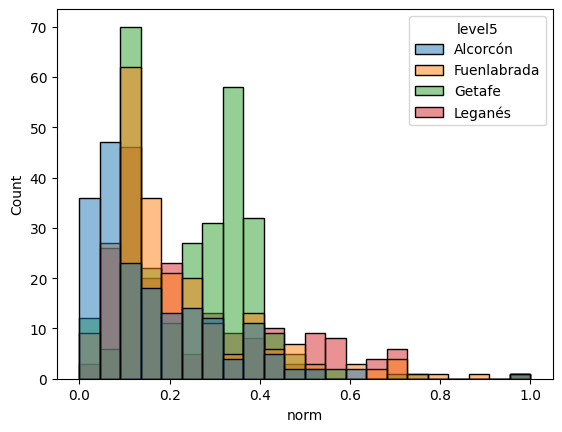

In [25]:
sns.histplot(data=result, x='norm', hue='level5')
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [26]:
# TODO
df_filter = df_cs[df_cs['level5'].isin(['Getafe','Alcorcón'])]
(
    df_filter
    .assign(pps=df_filter['price']/df_filter['surface'])
    .groupby('level5')['pps'].agg('mean').round(1)
)

print('Los precios medios de Alcorcón son mayores que los de Getafe')

Los precios medios de Alcorcón son mayores que los de Getafe


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

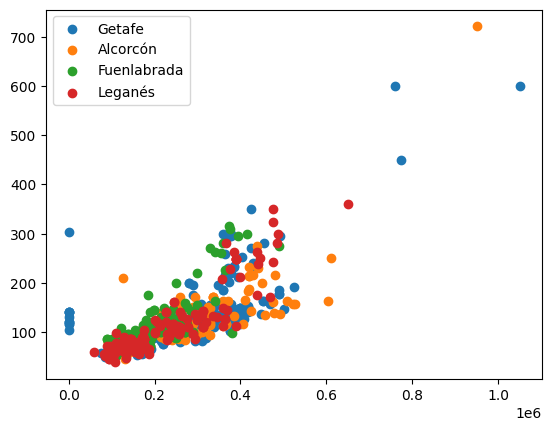

In [27]:
# TODO
plt.scatter(df_cs[df_cs['level5']=='Getafe']['price'],df_cs[df_cs['level5']=='Getafe']['surface'])
plt.scatter(df_cs[df_cs['level5']=='Alcorcón']['price'],df_cs[df_cs['level5']=='Alcorcón']['surface'])
plt.scatter(df_cs[df_cs['level5']=='Fuenlabrada']['price'],df_cs[df_cs['level5']=='Fuenlabrada']['surface'])
plt.scatter(df_cs[df_cs['level5']=='Leganés']['price'],df_cs[df_cs['level5']=='Leganés']['surface'])
plt.legend(['Getafe','Alcorcón','Fuenlabrada','Leganés'])
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [28]:
map = folium.Map()
mc = MarkerCluster().add_to(map)
for i in range(len(df_cs)):
    lat = df_cs['latitude'].to_list()[i]
    lon = df_cs['longitude'].to_list()[i]
    folium.Marker(location = [lat, lon]).add_to(mc)
map